#Model Building

###Importing required packages

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

###Reading Dataset

In [52]:
df = pd.read_csv('Final DataFrame.csv')

In [53]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Inflation/CPI', 'UNRATE', 'FEDFUNDS',
       'CCI', 'Market_Cap_to_GDP', 'Avg T10Y3M', 'Housing Price',
       'Debt_to_GDP', 'Manufacturing Output', 'M2V', 'Recession_US'],
      dtype='object')

In [54]:
df = df.drop('Unnamed: 0',axis = 1)

In [55]:
df.columns

Index(['Year', 'Month', 'Inflation/CPI', 'UNRATE', 'FEDFUNDS', 'CCI',
       'Market_Cap_to_GDP', 'Avg T10Y3M', 'Housing Price', 'Debt_to_GDP',
       'Manufacturing Output', 'M2V', 'Recession_US'],
      dtype='object')

In [56]:
df_model = df[['Inflation/CPI', 'UNRATE', 'FEDFUNDS',
       'CCI', 'Market_Cap_to_GDP', 'Avg T10Y3M', 'Housing Price',
       'Debt_to_GDP', 'Manufacturing Output', 'M2V', 'Recession_US']]

In [57]:
df_model.head()

,Inflation/CPI,UNRATE,FEDFUNDS,CCI,Market_Cap_to_GDP,Avg T10Y3M,Housing Price,Debt_to_GDP,Manufacturing Output,M2V,Recession_US
0,94.4,8.6,13.22,97.50,0.184275,1.676000,106.20,32.41298,91.302757,1.842,1
1,94.7,8.9,14.78,97.41,0.184275,0.131500,106.20,32.41298,91.302757,1.842,1
2,94.7,9.0,14.68,97.27,0.184275,0.546522,106.20,32.41298,91.302757,1.842,1
3,95.0,9.3,14.94,97.31,0.182363,0.503182,108.84,32.40213,91.302757,1.836,1
4,95.9,9.4,14.45,97.38,0.182363,0.865238,108.84,32.40213,91.302757,1.836,1


In [58]:
# get dummy data
df_dum = pd.get_dummies(df_model)

In [59]:
df_dum.head()

,Inflation/CPI,UNRATE,FEDFUNDS,CCI,Market_Cap_to_GDP,Avg T10Y3M,Housing Price,Debt_to_GDP,Manufacturing Output,M2V,Recession_US
0,94.4,8.6,13.22,97.50,0.184275,1.676000,106.20,32.41298,91.302757,1.842,1
1,94.7,8.9,14.78,97.41,0.184275,0.131500,106.20,32.41298,91.302757,1.842,1
2,94.7,9.0,14.68,97.27,0.184275,0.546522,106.20,32.41298,91.302757,1.842,1
3,95.0,9.3,14.94,97.31,0.182363,0.503182,108.84,32.40213,91.302757,1.836,1
4,95.9,9.4,14.45,97.38,0.182363,0.865238,108.84,32.40213,91.302757,1.836,1


### Splitting Data for Training and Test

In [60]:
# train test split
from sklearn.model_selection import train_test_split

X = df_dum.drop('Recession_US', axis =1)
Y = df_dum.Recession_US.values # values is a DataFrame method which returns NumPy array

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Using GridSearchCV

### Import necessary packages

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Initialze the estimators

In [62]:
rf_classifier = RandomForestClassifier(random_state = 42)
sv_classifier = SVC(probability = True, random_state = 42)
lr_classifier = LogisticRegression(random_state = 42)
gb_classifier = GradientBoostingClassifier(random_state = 42)

### Initiaze the hyperparameters for Random Forest

In [63]:
# Defining dictonary for various hyperparators and list of their possible values
param_rf = {} # parameter grid
param_rf['classifier__n_estimators'] = [10, 50, 100, 250]
param_rf['classifier__max_depth'] = [5, 10, 20]
param_rf['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_rf['classifier'] = [rf_classifier]

In [64]:
# Creating Pipeline
pipeline = Pipeline([('classifier', rf_classifier)])
params = [param_rf]

In [65]:
# finding best parameters and fitting the model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)

In [66]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier': RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=20,
                        n_estimators=250, random_state=42),
 'classifier__class_weight': {0: 1, 1: 10},
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [67]:
# the mean cross-validated score of the best_estimator
gs.best_score_

0.992208419599724

In [68]:
# Test data performance
from sklearn.metrics import *
print('Test Precision:', precision_score(gs.predict(x_test),y_test))
print('Test Recall:',recall_score(gs.predict(x_test), y_test))
print('Test F1 Score:',f1_score(gs.predict(x_test), y_test))
print('Test ROC AUC Score:', roc_auc_score(gs.predict(x_test), y_test))

Test Precision: 0.875
Test Recall: 0.875
Test F1 Score: 0.875
Test ROC AUC Score: 0.9318820224719101


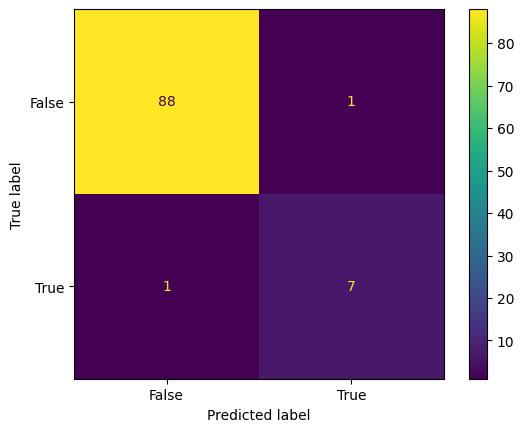

In [69]:
# Confusion Matrix
confusion_matrix1 = metrics.confusion_matrix(gs.predict(x_test), y_test)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels = [False, True])
cm_display1.plot()
plt.show()

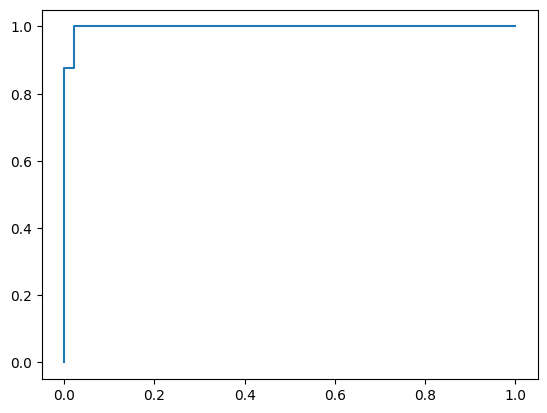

In [70]:
# roc-auc curve
y_predict_probab1 = gs.predict_proba(x_test)[:,1]

fpr, tpr,thresholds=roc_curve(y_test,y_predict_probab1)

# plot roc curve
plt.plot(fpr,tpr)
plt.show()

# SVM
- Parameter tuning, and
- model Building

#### Initialize the hyperparameters for SVM

In [71]:
param_svc = {}
param_svc['classifier__C'] = [10**-2 ,10**-1, 10**0, 10**1, 10**2]
param_svc['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_svc['classifier'] = [sv_classifier]

In [72]:
pipeline2 = Pipeline([('classifier', sv_classifier)])

In [73]:
gs2 = GridSearchCV(pipeline2, param_svc, cv=3, n_jobs=-1,scoring='roc_auc').fit(x_train, y_train)

In [74]:
# Best performing model and its corresponding hyperparameters
gs2.best_params_

{'classifier': SVC(C=100, class_weight={0: 1, 1: 25}, probability=True, random_state=42),
 'classifier__C': 100,
 'classifier__class_weight': {0: 1, 1: 25}}

In [75]:
# the mean cross-validated score of the best_estimator
gs2.best_score_

0.9736783988957903

In [76]:
# Test data performance
print("Test Precision:",precision_score(gs2.predict(x_test), y_test))
print("Test Recall:",recall_score(gs2.predict(x_test), y_test))
print("Test F1 Score:",f1_score(gs2.predict(x_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs2.predict(x_test), y_test))

Test Precision: 1.0
Test Recall: 0.38095238095238093
Test F1 Score: 0.5517241379310345
Test ROC AUC Score: 0.6904761904761905


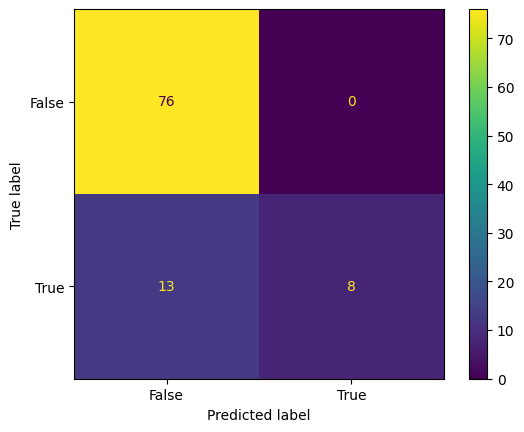

In [77]:
# Confusion Matrix
confusion_matrix2 = metrics.confusion_matrix(gs2.predict(x_test), y_test)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels=[False,True])
cm_display2.plot()
plt.show()

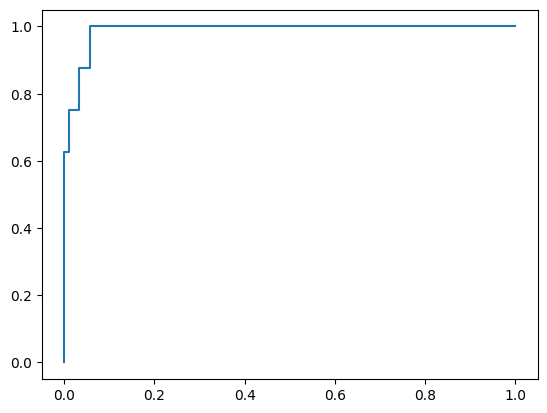

In [78]:
# roc-auc curve
y_predict_probab2 = gs2.predict_proba(x_test)[:,1]

fpr, tpr,thresholds=roc_curve(y_test,y_predict_probab2)

#plot roc curve
plt.plot(fpr,tpr)
plt.show()

### Logistic Regression
- Finding best Hyperparameters for Logstic Regression and
- Training the model

#### Initialize the hyperparameters for Logistic Regression

In [79]:
param_lr = {}
param_lr['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param_lr['classifier__penalty'] = ['l1','l2']
param_lr['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_lr['classifier'] = [lr_classifier]

In [80]:
pipeline = Pipeline([('classifier', lr_classifier)])

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
gs3 = GridSearchCV(pipeline, param_lr, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train,y_train)

In [83]:
# Best performing model and its corresponding hyperparameters
gs3.best_params_

{'classifier': LogisticRegression(C=10, class_weight={0: 1, 1: 5}, random_state=42),
 'classifier__C': 10,
 'classifier__class_weight': {0: 1, 1: 5},
 'classifier__penalty': 'l2'}

In [84]:
gs3.best_score_

0.9134989648033126

In [85]:
# Test data performance
print("Test Precision:",precision_score(gs3.predict(x_test), y_test))
print("Test Recall:",recall_score(gs3.predict(x_test), y_test))
print("Test F1 Score:",f1_score(gs3.predict(x_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs3.predict(x_test), y_test))

Test Precision: 0.5
Test Recall: 0.36363636363636365
Test F1 Score: 0.4210526315789474
Test ROC AUC Score: 0.6585623678646935


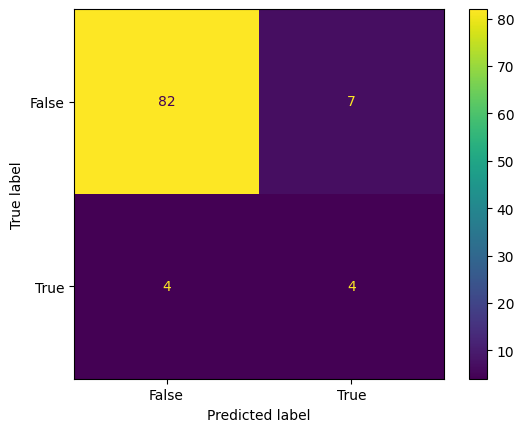

In [86]:
# Confusion Matrix
confusion_matrix3 = metrics.confusion_matrix(y_test,gs3.predict(x_test))

cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False,True])

cm_display3.plot()
plt.show()

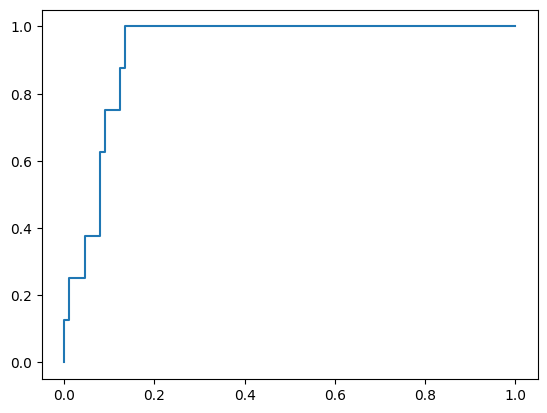

In [87]:
# roc-auc curve
y_predict_probab3 = gs3.predict_proba(x_test)[:,1]

fpr, tpr,thresholds=roc_curve(y_test,y_predict_probab3)

## plot roc curve
plt.plot(fpr,tpr)
plt.show()

#Gradient Boost

#### Initiaze the hyperparameters for Gradient Boost

In [88]:
param_gb = {}
param_gb['classifier__n_estimators'] = [10, 50, 100, 250]
param_gb['classifier__max_depth'] = [5, 10, 20]
param_gb['classifier'] = [gb_classifier]

In [89]:
pipeline4 = Pipeline([('classifier', gb_classifier)])

In [90]:
gs4 = GridSearchCV(pipeline4, param_gb, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)

In [91]:
# Best performing model and its corresponding hyperparameters
gs4.best_params_

{'classifier': GradientBoostingClassifier(max_depth=5, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

In [92]:
gs4.best_score_

0.9580400276052451

In [93]:
# Test data performance
print("Test Precision:",precision_score(gs4.predict(x_test), y_test))
print("Test Recall:",recall_score(gs4.predict(x_test), y_test))
print("Test F1 Score:",f1_score(gs4.predict(x_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs4.predict(x_test), y_test))

Test Precision: 0.875
Test Recall: 0.875
Test F1 Score: 0.875
Test ROC AUC Score: 0.9318820224719101


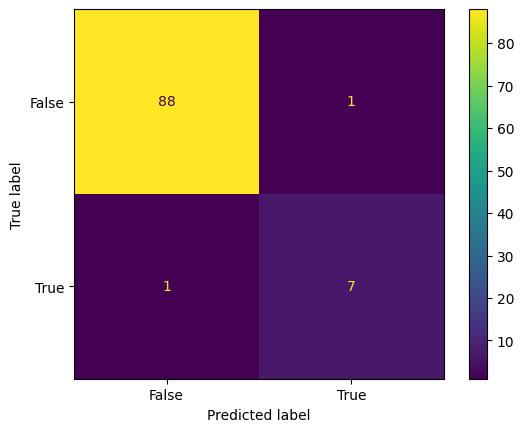

In [94]:
# Confusion Matrix
confusion_matrix4 = metrics.confusion_matrix(y_test,gs4.predict(x_test))

cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [False,True])

cm_display4.plot()
plt.show()

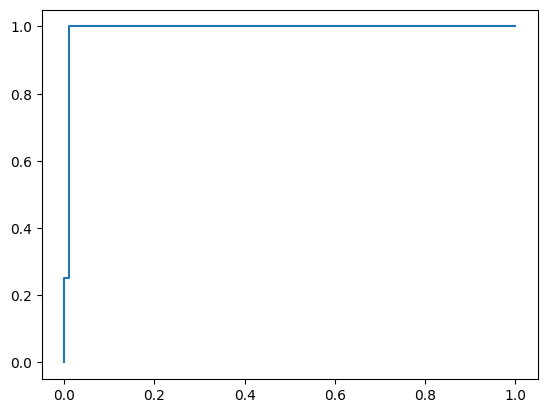

In [95]:
# roc-auc curve
y_predict_probab4 = gs4.predict_proba(x_test)[:,1]

fpr, tpr, thresholds=roc_curve(y_test,y_predict_probab4)

## plot roc curve
plt.plot(fpr,tpr)
plt.show()

### Model export

In [96]:
import pickle
model_file= open('recession_model.pk', 'wb') # wb - binary write mode
pickle.dump(gs4, model_file)
model_file.close

<function BufferedWriter.close>

In [97]:
test_sample = [[259,3.5,1.58,101.18,1.79,-0.03,450,107,99,1.4]]
print(gs4.predict(test_sample))

[1]


In [98]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [99]:
import sklearn
print(sklearn.__version__)

1.2.2
